In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)
pd.set_option('display.width', 1000)

In [2]:
def column_stats(df, column_name, n=None):
    if n is None:
        n = df.shape[0]
    count_column_name = column_name + "_count"
    count_df = pd.DataFrame(df[column_name].value_counts()).reset_index()
    count_df.columns=[column_name, count_column_name]
    count_df[column_name + "_percent"] = count_df[count_column_name].apply(lambda x: int(x)/n*100)
    print(f"Number of unique values = {len(df[column_name].unique())}")
    print(f"{count_df}")
    return count_df
    
def filter_with_threshold(df, column_name, threshold):
    print(f"Size of df = {df.shape}")
    n = df.shape[0]
    count_df = column_stats(df, column_name, n=n)
    percent_column_name = column_name + "_percent"
    filtered_count_df = count_df[count_df[percent_column_name] >= threshold]
    filtered_df = df[df[column_name].isin(list(filtered_count_df[column_name].values))]
    print(f"Size of filtered df = {filtered_df.shape}")
    column_stats(filtered_df, column_name, n=n)
    return filtered_df

In [3]:
def print_seq_len_histogram(df, n_bins):
    sns.histplot(df["seq_len"])
    print(f"min seq len = {min(df['seq_len'])}")
    print(f"max seq len = {max(df['seq_len'])}")
    plt.show()
    
    freq, bins = np.histogram(df["seq_len"], bins=n_bins)
    n = df.shape[0]
    hist_map = []
    for i in range(n_bins):
        hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})
    hist_df = pd.DataFrame(hist_map)
    print(hist_df)

# UniRef90 - EMBL mapping Dataset Generation


### uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq.csv

In [56]:
file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq.csv")

In [57]:
df = pd.read_csv(file_path)
df["seq_len"] = df["seq"].apply(lambda x: len(x))

### Deduplicate: Remove duplicates, retain the first occurence
#### TODO: Investigate the presence of 5 duplicate records

In [58]:
df = df[~df.duplicated()]

In [59]:
print("df size = ", df.shape)
df.head()

df size =  (267860, 11)


,uniref90_id,tax_id,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank,seq,seq_len
0,UniRef90_D6NXI8,11676,ADF86160.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,MAGRSGDSDEELLRVVRIIKQIYQSNPPPNPEGTRQARRNRRRRWR...,116
1,UniRef90_L0BZL1,11676,AFZ96186.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,EXEKEGKISKIGPENPYNTPIFAIKKKDSTKWRKLVDFRELNKRTQ...,199
2,UniRef90_D6NXI9,11676,ADF86161.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,MAGRSGDSDEXLLRTIRLIRILYQSNPPPSSKGTRQARRNRRRRWR...,94
3,UniRef90_A0A023HQ48,28875,AGO66969.1,['Homo sapiens'],Homo sapiens,Rotavirus A,species,9606,species,KGWPTGSVYFKEYSSIVDFSVDPQLYCDYNLVLMKYDQNLELDMSE...,218
4,UniRef90_L0BZL4,11676,AFZ95585.1,['Homo sapiens'],Homo sapiens,Human immunodeficiency virus 1,species,9606,species,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...,377


In [60]:
column_stats(df, "virus_name")

Number of unique values = 3779
                                             virus_name  virus_name_count  virus_name_percent
0                        Human immunodeficiency virus 1            215415           80.420742
1                                   Hepacivirus hominis             10947            4.086836
2                                     Hepatitis B virus             10152            3.790040
3                          Human immunodeficiency virus              2095            0.782125
4                                  Human papillomavirus              1078            0.402449
5                   Simian-Human immunodeficiency virus              1030            0.384529
6                        Human immunodeficiency virus 2               788            0.294184
7                                           Rotavirus A               749            0.279624
8                                         Riboviria sp.               563            0.210184
9                         Sim

In [61]:
column_stats(df, "virus_host_name")

Number of unique values = 1314
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                 247413                92.366535
1                                            Sus scrofa                   1286                 0.480102
2                                        Macaca mulatta                   1081                 0.403569
3                             Hydrochoerus hydrochaeris                    627                 0.234078
4                                    Marmota himalayana                    539                 0.201225
5                                         Gallus gallus                    484                 0.180691
6                                           Felis catus                    441                 0.164638
7                                       Cyprinus carpio                    411                 0.153438
8                                

min seq len = 11
max seq len = 8249


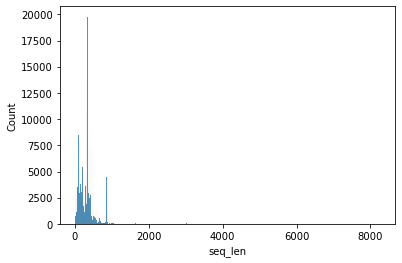

     start     end   count  percentage
0     11.0   697.5  246481   92.018592
1    697.5  1384.0   19558    7.301575
2   1384.0  2070.5     533    0.198985
3   2070.5  2757.0     552    0.206078
4   2757.0  3443.5     604    0.225491
5   3443.5  4130.0      57    0.021280
6   4130.0  4816.5      16    0.005973
7   4816.5  5503.0       6    0.002240
8   5503.0  6189.5       6    0.002240
9   6189.5  6876.0      18    0.006720
10  6876.0  7562.5      22    0.008213
11  7562.5  8249.0       7    0.002613


In [62]:
print_seq_len_histogram(df, 12)

## Non - Immunodeficiency Virus

In [63]:
virus_names = list(df["virus_name"].unique())
print(f"Number of unique viruses = {len(virus_names)}")
virus_names

Number of unique viruses = 3779


['Human immunodeficiency virus 1',
 'Rotavirus A',
 'Rhinovirus B',
 'Orthohantavirus puumalaense',
 'Hantavirus sp.',
 'Vientovirus',
 'Rhinovirus A',
 'Cencurut virus',
 'Hepatitis B virus',
 'Rhinovirus C',
 'Avian coronavirus',
 'Nyangole orthobunyavirus',
 'Betacoronavirus 1',
 'Feline leukemia virus',
 'Sapporo virus',
 'Paslahepevirus balayani',
 'Hepacivirus hominis',
 'Human papillomavirus',
 'Mastomys natalensis cytomegalovirus 2',
 'Mastomys natalensis cytomegalovirus 1',
 'Parechovirus A',
 'Macaca mulatta papillomavirus 5',
 'Macaca mulatta papillomavirus 7',
 'Macaca mulatta papillomavirus 6',
 'Betanodavirus sp.',
 'Enterovirus B',
 'Mammarenavirus loeiense',
 'Human rhinovirus sp.',
 'Penguin herpesvirus 2',
 'Volepox virus',
 'Skunkpox virus',
 'Chikungunya virus',
 'Paramyxovirus A69-1',
 'Paramyxovirus C40',
 'Paramyxovirus A69-2',
 'Orthonairovirus haemorrhagiae',
 'Lonchura striata deltavirus',
 'Herpesvirus DDDp',
 'Feline immunodeficiency virus',
 'Peromyscus leu

In [64]:
idv_names = list(filter(lambda x: "immunodeficiency" in x.lower(), virus_names))

In [65]:
idv_names

['Human immunodeficiency virus 1',
 'Feline immunodeficiency virus',
 'Simian immunodeficiency virus',
 'Human immunodeficiency virus',
 'Human immunodeficiency virus 2',
 'Simian-Human immunodeficiency virus',
 'Bovine immunodeficiency virus']

In [66]:
non_idv_df = df[~df["virus_name"].isin(idv_names)]
non_idv_df.shape

(47792, 11)

In [67]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv.csv")
non_idv_df.to_csv(output_file_path, index=False)

In [70]:
column_stats(non_idv_df, "virus_name")

Number of unique values = 3772
                                             virus_name  virus_name_count  virus_name_percent
0                                   Hepacivirus hominis             10947           22.905507
1                                     Hepatitis B virus             10152           21.242049
2                                  Human papillomavirus              1078            2.255608
3                                           Rotavirus A               749            1.567208
4                                         Riboviria sp.               563            1.178021
5                                 Marmot picobirnavirus               529            1.106880
6                               Paslahepevirus balayani               431            0.901825
7                                     Bacteriophage sp.               411            0.859977
8                                 Hepatitis delta virus               400            0.836960
9                            

In [71]:
column_stats(non_idv_df, "virus_host_name")

Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535
8                                

min seq len = 11
max seq len = 8249


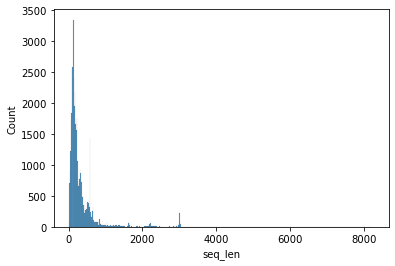

     start     end  count  percentage
0     11.0   697.5  44007   92.080264
1    697.5  1384.0   1967    4.115752
2   1384.0  2070.5    530    1.108972
3   2070.5  2757.0    552    1.155005
4   2757.0  3443.5    604    1.263810
5   3443.5  4130.0     57    0.119267
6   4130.0  4816.5     16    0.033478
7   4816.5  5503.0      6    0.012554
8   5503.0  6189.5      6    0.012554
9   6189.5  6876.0     18    0.037663
10  6876.0  7562.5     22    0.046033
11  7562.5  8249.0      7    0.014647


In [72]:
print_seq_len_histogram(non_idv_df, 12)

**Sequence Length Parameters**

In [73]:
np.percentile(non_idv_df["seq_len"].values, [90, 95, 99])

array([ 623.9 , 1035.35, 3011.  ])

**Number of host classes**

In [87]:
# 1% cutoff
filtered_df = filter_with_threshold(non_idv_df, "virus_host_name", 1)

Size of df = (47792, 11)
Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535
8       

In [88]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5.csv")
filtered_df.to_csv(output_file_path, index=False)

In [89]:
# 0.7% cutoff
filtered_df = filter_with_threshold(non_idv_df, "virus_host_name", 0.7)

Size of df = (47792, 11)
Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535
8       

In [90]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.007_c7.csv")
filtered_df.to_csv(output_file_path, index=False)

In [91]:
# 0.5% cutoff
filtered_df = filter_with_threshold(non_idv_df, "virus_host_name", 0.5)

Size of df = (47792, 11)
Number of unique values = 1304
                                        virus_host_name  virus_host_name_count  virus_host_name_percent
0                                          Homo sapiens                  28782                60.223468
1                                            Sus scrofa                   1286                 2.690827
2                             Hydrochoerus hydrochaeris                    627                 1.311935
3                                    Marmota himalayana                    539                 1.127804
4                                         Gallus gallus                    484                 1.012722
5                                       Cyprinus carpio                    411                 0.859977
6                                    Petroica australis                    408                 0.853699
7                                           Felis catus                    298                 0.623535
8       

In [92]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.005_c13.csv")
filtered_df.to_csv(output_file_path, index=False)

## Immunodeficiency Virus

In [68]:
idv_df = df[df["virus_name"].isin(idv_names)]
idv_df.shape

(220068, 11)

In [69]:
output_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv.csv")
idv_df.to_csv(output_file_path, index=False)

### Immunodeficiency Virus infecting top 5 prevalent hosts

In [4]:
file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_non_idv_t0.01_c5.csv")
df = pd.read_csv(file_path)

In [5]:
print(df.shape)
unique_virus_hosts = list(df["virus_host_name"].unique())
unique_virus_hosts

(31718, 11)


['Homo sapiens',
 'Sus scrofa',
 'Gallus gallus',
 'Marmota himalayana',
 'Hydrochoerus hydrochaeris']

In [4]:
idv_file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv.csv")
idv_df = pd.read_csv(idv_file_path)
idv_df.shape

(220068, 11)

In [5]:
column_stats(idv_df, "virus_name")

Number of unique values = 7
                            virus_name  virus_name_count  virus_name_percent
0       Human immunodeficiency virus 1            215415           97.885654
1         Human immunodeficiency virus              2095            0.951978
2  Simian-Human immunodeficiency virus              1030            0.468037
3       Human immunodeficiency virus 2               788            0.358071
4        Simian immunodeficiency virus               538            0.244470
5        Feline immunodeficiency virus               198            0.089972
6        Bovine immunodeficiency virus                 4            0.001818


,virus_name,virus_name_count,virus_name_percent
0,Human immunodeficiency virus 1,215415,97.885654
1,Human immunodeficiency virus,2095,0.951978
2,Simian-Human immunodeficiency virus,1030,0.468037
3,Human immunodeficiency virus 2,788,0.358071
4,Simian immunodeficiency virus,538,0.244470
5,Feline immunodeficiency virus,198,0.089972
6,Bovine immunodeficiency virus,4,0.001818


In [6]:
column_stats(idv_df, "virus_host_name")

Number of unique values = 40
                       virus_host_name  virus_host_name_count  virus_host_name_percent
0                         Homo sapiens                 218631                99.347020
1                       Macaca mulatta                    849                 0.385790
2                          Felis catus                    143                 0.064980
3                      Cercocebus atys                    122                 0.055437
4                        Puma concolor                     24                 0.010906
5                    Macaca nemestrina                     23                 0.010451
6                    Mandrillus sphinx                     23                 0.010451
7               Mandrillus leucophaeus                     20                 0.009088
8              Cercopithecus nictitans                     19                 0.008634
9                Cercopithecus solatus                     17                 0.007725
10            

,virus_host_name,virus_host_name_count,virus_host_name_percent
0,Homo sapiens,218631,99.347020
1,Macaca mulatta,849,0.385790
2,Felis catus,143,0.064980
3,Cercocebus atys,122,0.055437
4,Puma concolor,24,0.010906
5,Macaca nemestrina,23,0.010451
6,Mandrillus sphinx,23,0.010451
7,Mandrillus leucophaeus,20,0.009088
8,Cercopithecus nictitans,19,0.008634
9,Cercopithecus solatus,17,0.007725


In [7]:
idv_df_c5 = idv_df[idv_df["virus_host_name"].isin(unique_virus_hosts)]
print(idv_df_c5.shape)
unique_virus_hosts = list(idv_df_c5["virus_host_name"].unique())
unique_virus_hosts

(218631, 11)


['Homo sapiens']

In [11]:
file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90/20240131/uniref90_viridae_embl_hosts_pruned_metadata_species_vertebrates_w_seq_idv_c5.csv")
idv_df_c5.to_csv(file_path, index=False)